# Desafío 2. Modelos de regresion lineal 
 

# Introducción

A partir del dataset resultado del TP1 vamos a construir un modelo de regresión lineal que estime el precio por m2 de las propiedades.
El modelo puede construirse involucrando sólo un subconjunto del dataset limpio, con algunas  características particulares. Por ejemplo, sólo departamentos en los barrios de Belgrano y Palermo ó sólo PHs del barrio de Almagro y Villa Crespo, ó sólo propiedades industriales en Pompeya. El dataset que modelen debe tener al menos 2000 registros


# objetivos:

●	Seleccionar los datos a modelar. Justificar esa selección.
●	Entrenar al menos tres modelos de regresión lineal distintos sobre estos datos.
●	Evaluar la performance de los modelos y comparar ventajas y desventajas de cada uno.
●	Determinar la importancia de las features incluidas en la predicción. Interpretar

In [1]:
# Dataset Properati
import pandas as pd
df =pd.read_csv('/Users/Claudia/Documents/BITACORAS ACAMICA/grupo4b.xls')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Claudia/Documents/BITACORAS ACAMICA/grupo4b.xls'

mostramos la distribucion de los datos 

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

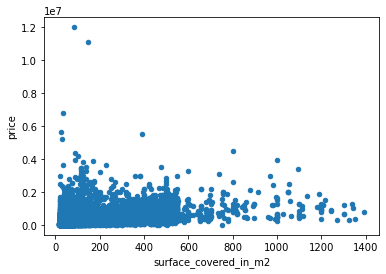

In [14]:
df.plot(kind='scatter', x='surface_covered_in_m2', y='price')

C:\Users\Claudia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Claudia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Claudia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

Text(0, 0.5, 'Density')

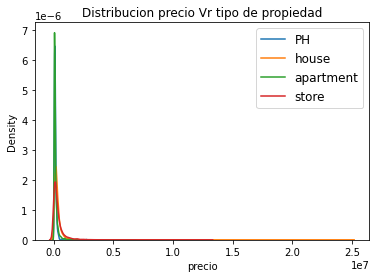

In [27]:
dist=df[df.property_type == 'PH']
sns.distplot(dist['price'], hist = False, kde = True, label='PH')
dist =df[df.property_type == 'house']
sns.distplot(dist['price'], hist = False, kde = True, label='house')
dist =df[df.property_type == 'apartment']
sns.distplot(dist['price'], hist = False, kde = True, label='apartment')
dist=df[df.property_type == 'store']
sns.distplot(dist['price'], hist = False, kde = True, label='store')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribucion precio Vr tipo de propiedad')
plt.xlabel('precio')
plt.ylabel('Density') 

los outliers generan mucha dispersion y ruido buscamos eliminarlos para tener datos mas copactos

In [28]:
#para eliminar outliers de un Dataframe utilizamos la tecnica del rango intercuartilico IQR 
# Definimoslos cuartiles
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
#definimos IQR
IQR=Q3-Q1
print(IQR)

Unnamed: 0               57421.5
price                    88500.0
surface_covered_in_m2       42.0
floor                        4.0
rooms                        1.0
expenses                  1700.0
dtype: float64


In [29]:
#LOS ELIMINO 
df1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df1.shape

C:\Users\Claudia\AppData\Local\Temp/ipykernel_9948/1387295774.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(57664, 11)

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price'>

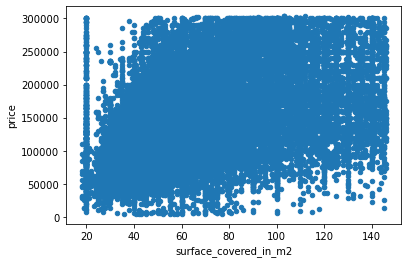

In [30]:
df1.plot(kind='scatter', x='surface_covered_in_m2', y='price')

# Ioni

Me sorprende un poco en el grafico de arriba que haya tantos puntos en 20m2. tambien creo que es un poco poco cortar en los valores que cortaste, fijate que los bordes son muy marcados, esta claro que hay valores mas alla que siguen y que podrian ayudar al modelo.

C:\Users\Claudia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Claudia\AppData\Local\Temp/ipykernel_9948/4175014548.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dist =df1[df.property_type == 'house']
C:\Users\Claudia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Claudia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureW

Text(0, 0.5, 'Density')

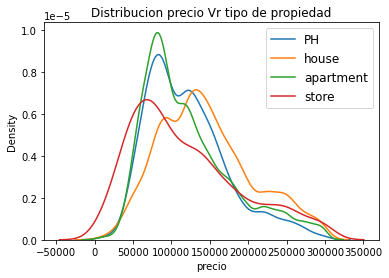

In [31]:
dist=df1[df1.property_type == 'PH']
sns.distplot(dist['price'], hist = False, kde = True, label='PH')
dist =df1[df.property_type == 'house']
sns.distplot(dist['price'], hist = False, kde = True, label='house')
dist =df1[df1.property_type == 'apartment']
sns.distplot(dist['price'], hist = False, kde = True, label='apartment')
dist=df1[df1.property_type == 'store']
sns.distplot(dist['price'], hist = False, kde = True, label='store')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribucion precio Vr tipo de propiedad')
plt.xlabel('precio')
plt.ylabel('Density') 

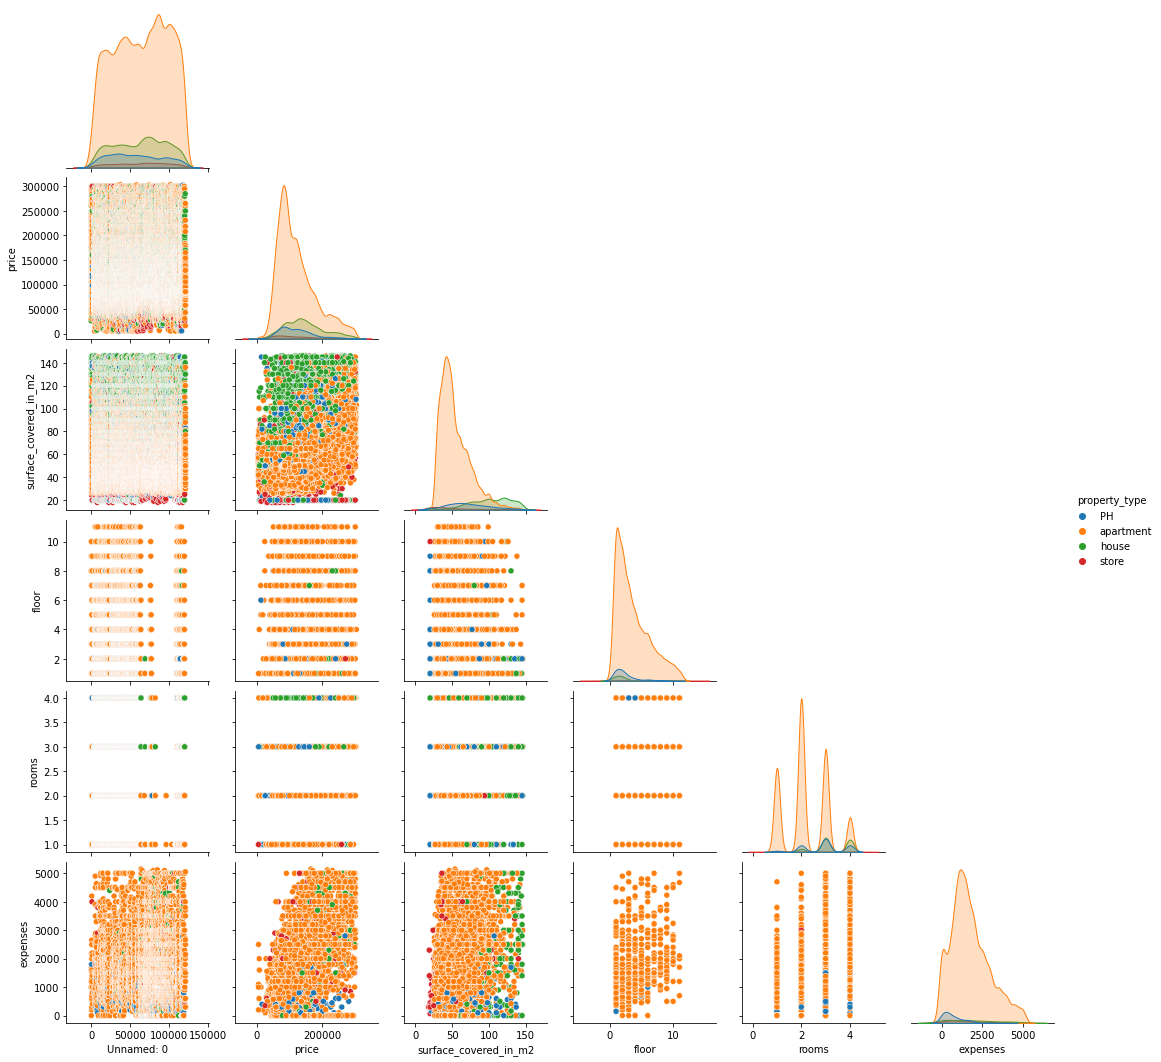

In [36]:
sns.pairplot(data=df1,hue='property_type',corner=True)

# Ioni

El analisis exploratorio esta bien, yo hubiera sido menos estricto en el recorte y no em queda claro que pasa con los Nans ni con las columnas generadas porque no puedo reejecutar el codigo al no tener el archivo del que parte.

# Modelos

In [37]:
#importamos las librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df1.shape

(57664, 11)

In [43]:
mlearn=df[df.state_name.str.contains('Capital Federal','Bs.As. G.B.A. Zona Norte')& df.property_type.str.contains('apartment|house|PH')]
mlearn=mlearn[(mlearn['surface_covered_in_m2']<=1000)&(mlearn['surface_covered_in_m2']>=15)&(mlearn['price']<=4000000)]
mlearn

,Unnamed: 0,property_type,place_name,state_name,price,surface_covered_in_m2,floor,rooms,expenses,regex1,direccion
0,0,PH,Mataderos,Capital Federal,62000.0,40.0,NaN,NaN,NaN,NaN,NaN
2,2,apartment,Mataderos,Capital Federal,72000.0,55.0,NaN,NaN,NaN,NaN,NaN
5,7,apartment,Belgrano,Capital Federal,138000.0,40.0,NaN,NaN,NaN,NaN,NaN
6,8,apartment,Belgrano,Capital Federal,195000.0,60.0,NaN,NaN,NaN,NaN,NaN
10,13,apartment,Palermo Soho,Capital Federal,111700.0,30.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
80424,121160,apartment,Belgrano,Capital Federal,410000.0,157.0,NaN,NaN,6300.0,NaN,NaN
80471,121209,apartment,Belgrano,Capital Federal,410000.0,157.0,NaN,NaN,6300.0,NaN,NaN
80472,121215,apartment,Belgrano,Capital Federal,870000.0,93.0,NaN,NaN,10000.0,NaN,NaN
80474,121217,apartment,Villa Urquiza,Capital Federal,131500.0,39.0,NaN,NaN,NaN,NaN,NaN


### Modelo OLS

creamos el modelo, definiendo las variables 

In [47]:
#establecemos las variables independientes del modelo, tambien conocidas como β_tas o entradas: X
X = mlearn["surface_covered_in_m2"]          
# agregamos un intercepto al modelo (β_cero)
X = sm.add_constant(X)  
# establecemos la variable dependiente,variable respuesta o lo que queremos predecir: Y
y = mlearn["price"]                            

# cuadramos el modelo

model_1= sm.OLS(y, X).fit()              
res= model_1.predict(X)

In [49]:
# miramos los  principales resultados de la regresion 
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                 1.312e+04
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:46:06   Log-Likelihood:            -3.1217e+05
No. Observations:               23378   AIC:                         6.243e+05
Df Residuals:                   23376   BIC:                         6.244e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.795e+

las variables independientes explican un 35% de la variacion de la variable dependiente Y, un incremento en la superficie por metro cuadrado genera una variacion de 1855.74 dolares en el precio, manteniendo las demas variables constantes.
el p- value es menor a 0.05 indicando que la variable superfice cubierta en m2 es estadisticamente significativa, 

# Ioni

Esta dando un R muy bajo. Supongo que debe ser porque tenes nans? No se porque no puedo reejecutar. Tambien puede ser porque estas mezclando tipos de propiedad y entonces eso hace que para una misma superficie haya propiedades con precios muy diferentes. No es buena idea despues del analisis de mas arriba donde se ve que claramente difiere el criterio de precio segun el tipo de propiedad mezclar tipos de propiedad sin siquiera al menos separarlas con una variable dummy.

In [2]:
# espacio del grafico
fig, ax = plt.subplots(figsize=(8,6)) 
#etiquetas
ax.plot(mlearn["surface_covered_in_m2"] , mlearn["price"] , 'o', label="Datos")                        
ax.plot(mlearn["surface_covered_in_m2"], model_1.fittedvalues, 'r--.', label="Ajustado") 
# leyendas
legend = ax.legend(loc="best")         
#etiquetas ejes  
plt.xlabel('superficie en metros cuadrados')                                          
plt.ylabel('precio propiedad')                             
# Titulo
plt.title('Diagrama de dispersión con la recta del modelo ajustado');    

NameError: name 'plt' is not defined

In [65]:
# Moldelo regresion 

In [66]:
#como intentamos predecir un valor continuo, utilizaremos como metrica 
#el regresor (RMSE):nuestro dato a predecir,es de tipo númerico: precio
# como vimos anteriormente la variable con mayor influencia en el precio es la superficie total
X=mlearn[['surface_covered_in_m2']] 
y=mlearn['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(16364, 1) (16364,) (7014, 1) (7014,)


entrenamos el modelo

In [67]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [68]:
print(linear_model.coef_, linear_model.intercept_)

[1849.21986451] 78751.9706085347


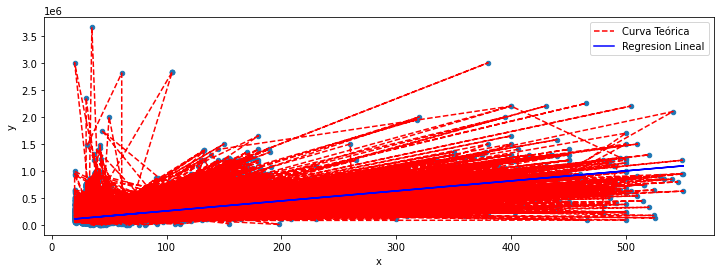

In [69]:
plt.figure(figsize = (12,4))

plt.subplot(1,1,1)
plt.scatter(X,y,s = 20)
plt.plot(X, y, '--',label ='Curva Teórica', c = 'r')
plt.plot(X,linear_model.predict(X),label ='Regresion Lineal', c = 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()



# Ioni

Aca no tiene sentido la linea 

plt.plot(X, y, '--',label ='Curva Teórica', c = 'r')

porque te une los puntos, ya tenes los puntos reales con el scatter, sobre eso hacer la recta del modelo y estas. Ojo que lo que pones en la celda siguiente no es cierto. Es un problema de graficacion, no del modelo. El modelo de hecho te diria que tiene un poco de underfiting (de hecho el R da bastante mal y mas no se puede simplificar). 

en el grafico anterior vemos que el modelo no es bueno , tiene overfiting se adapta de manera exagerada a los datos

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 150503.53681238208
Raíz del error cuadrático medio en Test: 156663.43862718076


C:\Users\Claudia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Claudia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


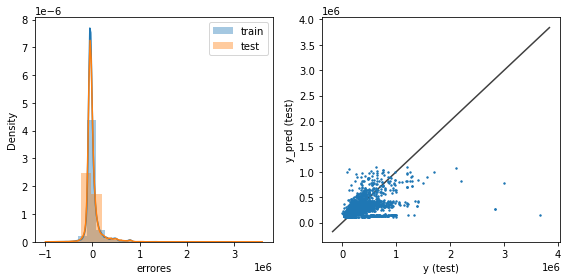

In [70]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelo = ['Regresión lineal']

for i, model in enumerate([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelo[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# Ioni

Porque no comparas directamente el R? Igual para mi el problema esta en que el R es bajo por lo que mencione del tipo de propiedades.